In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("test.csv")
df.head()

User_ID  Age    Country Streaming Platform Top Genre  \
0   U1000   34      Japan              Tidal    Reggae   
1   U1001   24    Germany             Deezer   Country   
2   U1002   49    Germany             Deezer       Pop   
3   U1003   55  Australia            YouTube    Reggae   
4   U1004   13    Germany       Amazon Music    Reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              Free                                Afternoon   
1           Premium                                    Night   
2           Premium                                Afternoon   
3           Premium                                  Morning   
4              Free                                    Night   

   Discover Weekly Engagement (%)  Repeat Song Rate (%)  
0                           47.42                 16.74  
1                           12.06                 69.25  
2                           47.19                 67.38  
3                           31.27                 76.51  
4                           30.68                 43.41

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [4]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [5]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-5-f01ffbd33229>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [8]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

In [11]:
df.head()

User_ID  Age    Country Streaming Platform Top Genre  \
0   u1000   34      japan              tidal    reggae   
1   u1001   24    germany             deezer   country   
2   u1002   49    germany             deezer       pop   
3   u1003   55  australia            youtube    reggae   
4   u1004   13    germany       amazon music    reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              adele   
1                        86                    388         ed sheeran   
2                       363                    368        post malone   
3                       348                    349           dua lipa   
4                        30                    328              adele   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              free                                afternoon   
1           premium                                    night   
2           premium                                afternoon   
3           premium                                  morning   
4              free                                    night   

   Discover Weekly Engagement (%)  Repeat Song Rate (%)  
0                           47.42                 16.74  
1                           12.06                 69.25  
2                           47.19                 67.38  
3                           31.27                 76.51  
4                           30.68                 43.41

In [12]:
df.describe(include='all')

User_ID          Age    Country Streaming Platform Top Genre  \
count     5000  5000.000000       5000               5000      5000   
unique    5000          NaN         10                  6        10   
top      u1000          NaN  australia       amazon music    reggae   
freq         1          NaN        526                861       532   
mean       NaN    36.664000        NaN                NaN       NaN   
std        NaN    13.763844        NaN                NaN       NaN   
min        NaN    13.000000        NaN                NaN       NaN   
25%        NaN    25.000000        NaN                NaN       NaN   
50%        NaN    37.000000        NaN                NaN       NaN   
75%        NaN    49.000000        NaN                NaN       NaN   
max        NaN    60.000000        NaN                NaN       NaN   

        Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
count                5000.000000             5000.00000               5000   
unique                       NaN                    NaN                 10   
top                          NaN                    NaN          bad bunny   
freq                         NaN                    NaN                528   
mean                  309.237200              253.51720                NaN   
std                   172.029822              146.36928                NaN   
min                    10.000000                1.00000                NaN   
25%                   161.000000              126.00000                NaN   
50%                   316.000000              254.00000                NaN   
75%                   457.250000              382.00000                NaN   
max                   600.000000              500.00000                NaN   

       Subscription Type Listening Time (Morning/Afternoon/Night)  \
count               5000                                     5000   
unique                 2                                        3   
top              premium                                    night   
freq                2526                                     1745   
mean                 NaN                                      NaN   
std                  NaN                                      NaN   
min                  NaN                                      NaN   
25%                  NaN                                      NaN   
50%                  NaN                                      NaN   
75%                  NaN                                      NaN   
max                  NaN                                      NaN   

        Discover Weekly Engagement (%)  Repeat Song Rate (%)  
count                      5000.000000           5000.000000  
unique                             NaN                   NaN  
top                                NaN                   NaN  
freq                               NaN                   NaN  
mean                         50.296464             42.391060  
std                          23.171936             21.444121  
min                          10.020000              5.000000  
25%                          30.147500             24.195000  
50%                          50.420000             41.960000  
75%                          70.337500             60.740000  
max                          89.990000             79.990000

In [13]:
df.skew(numeric_only=True)

Age                              -0.007464
Minutes Streamed Per Day         -0.049038
Number of Songs Liked            -0.020623
Discover Weekly Engagement (%)   -0.011745
Repeat Song Rate (%)              0.020087
dtype: float64

In [14]:
df.var(numeric_only=True)

Age                                 189.443393
Minutes Streamed Per Day          29594.259788
Number of Songs Liked             21423.966097
Discover Weekly Engagement (%)      536.938598
Repeat Song Rate (%)                459.850336
dtype: float64

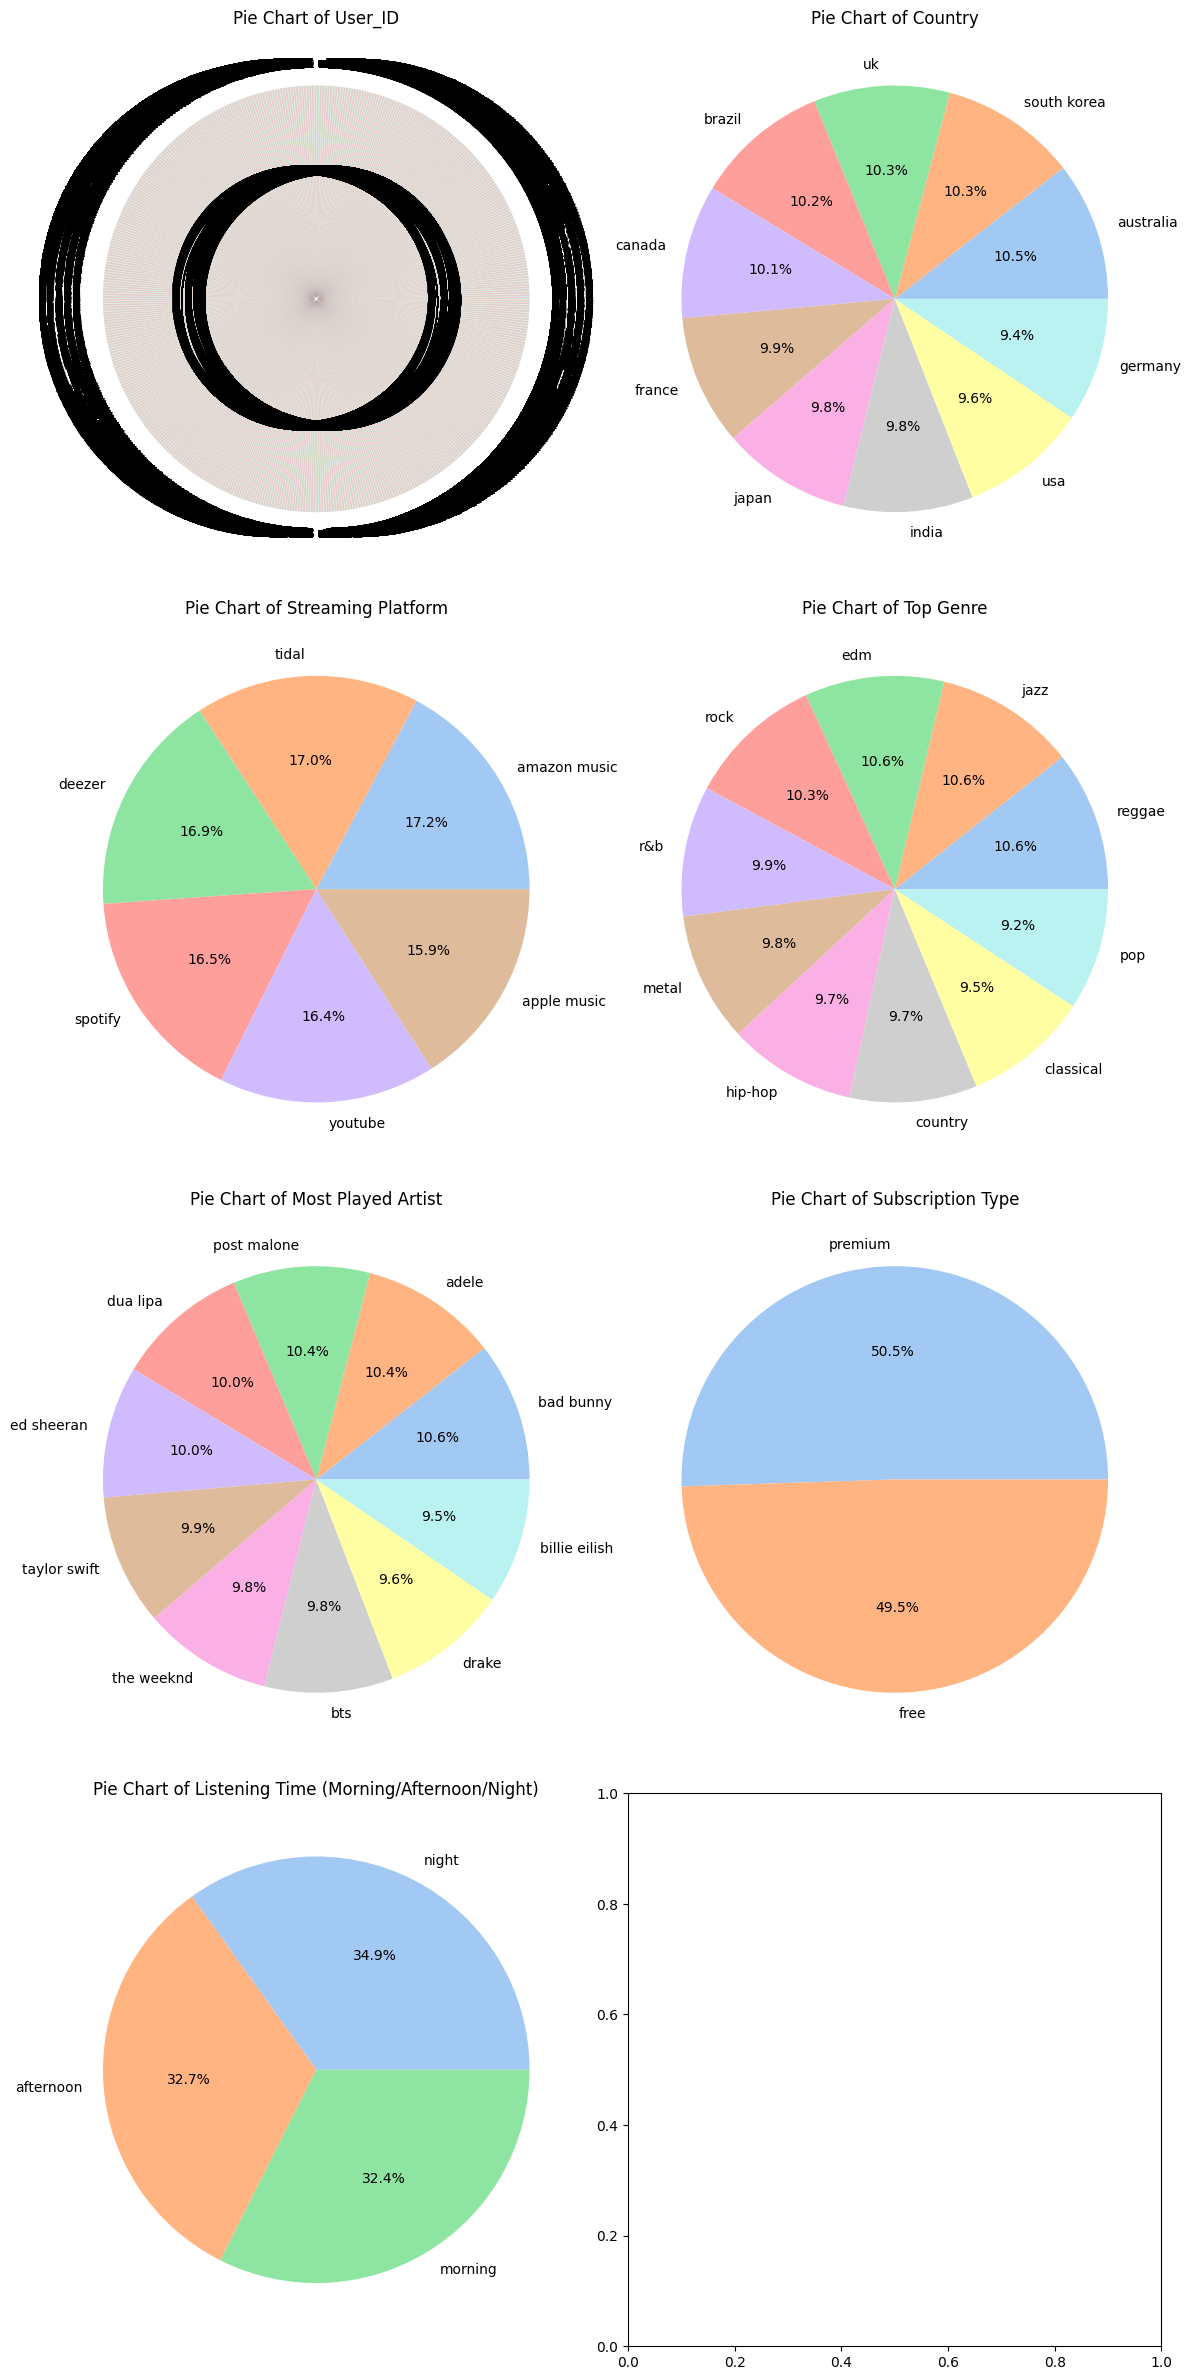

In [43]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'User_ID']
num_plots = len(cat_cols)
rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), ax=axes[i])
    axes[i].set_title(f"Pie Chart of {col}")
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

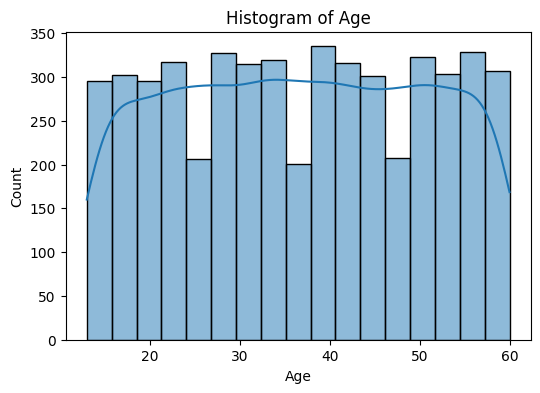

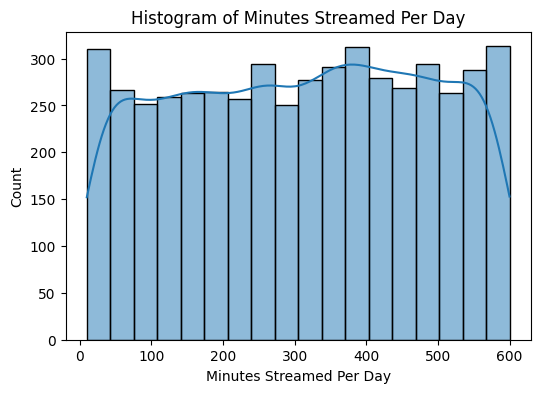

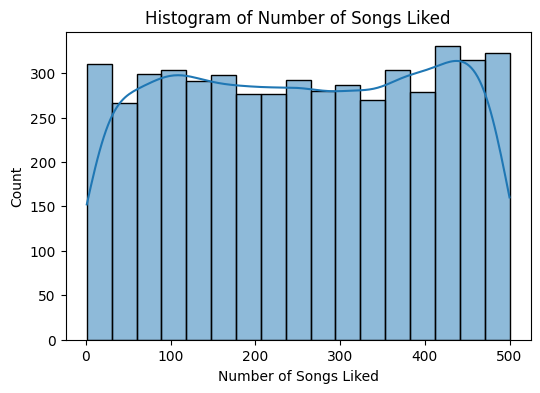

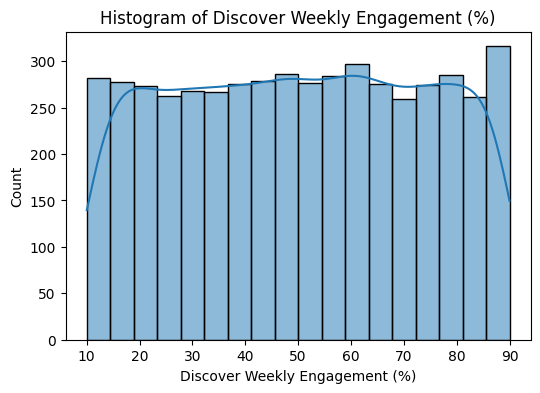

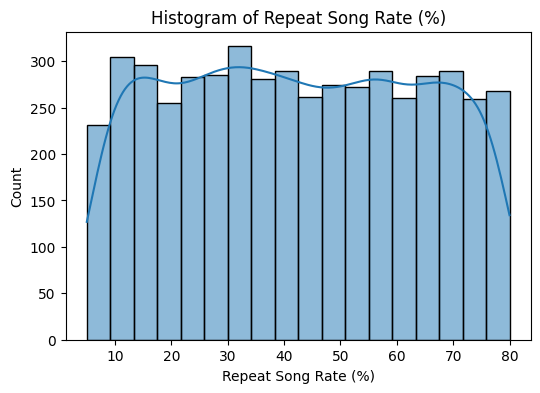

In [16]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

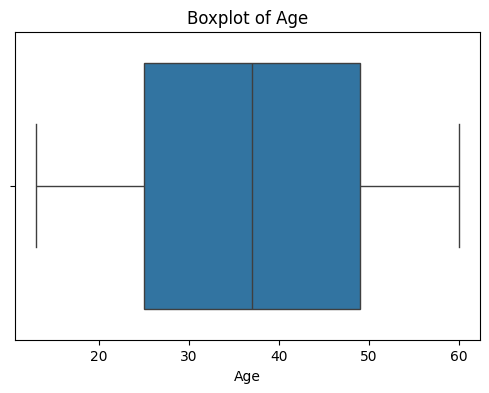

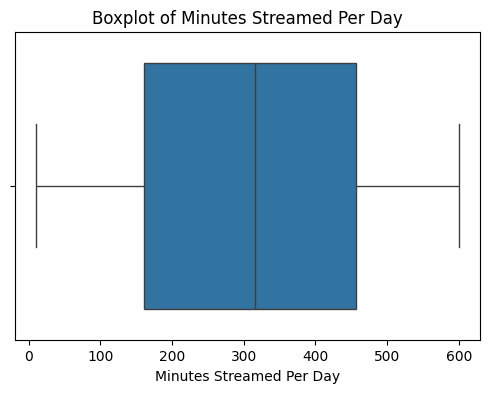

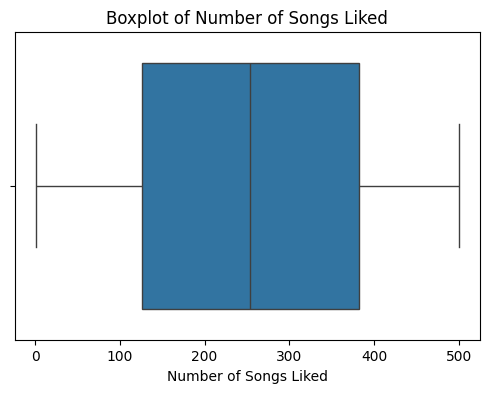

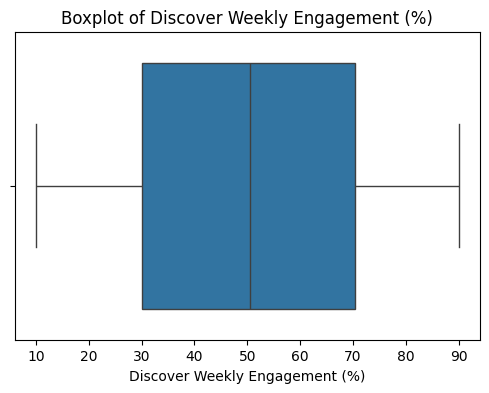

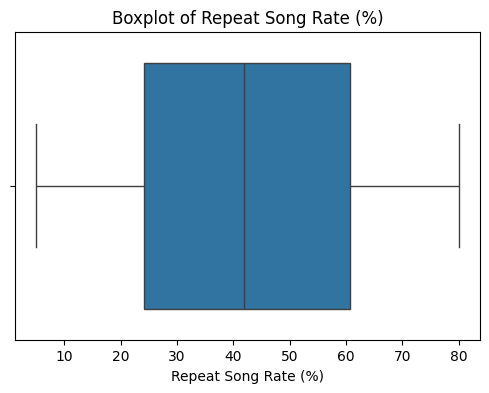

In [17]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [42]:
print("\nCorrelation Matrix:")
print(df[num_cols].corr())

# Grouped Comparisons (Violin Plot)
if 'genre' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=df['genre'], y=df['time'], palette="viridis")
    plt.title("Violin Plot: Time Spent vs Genre")
    plt.xticks(rotation=45)
    plt.show()


Correlation Matrix:
                                     Age  Minutes Streamed Per Day  \
Age                             1.000000                  0.004166   
Minutes Streamed Per Day        0.004166                  1.000000   
Number of Songs Liked          -0.016668                  0.023487   
Discover Weekly Engagement (%) -0.008872                 -0.004280   
Repeat Song Rate (%)            0.007626                 -0.037508   

                                Number of Songs Liked  \
Age                                         -0.016668   
Minutes Streamed Per Day                     0.023487   
Number of Songs Liked                        1.000000   
Discover Weekly Engagement (%)               0.012447   
Repeat Song Rate (%)                         0.005942   

                                Discover Weekly Engagement (%)  \
Age                                                  -0.008872   
Minutes Streamed Per Day                             -0.004280   
Number of Songs L

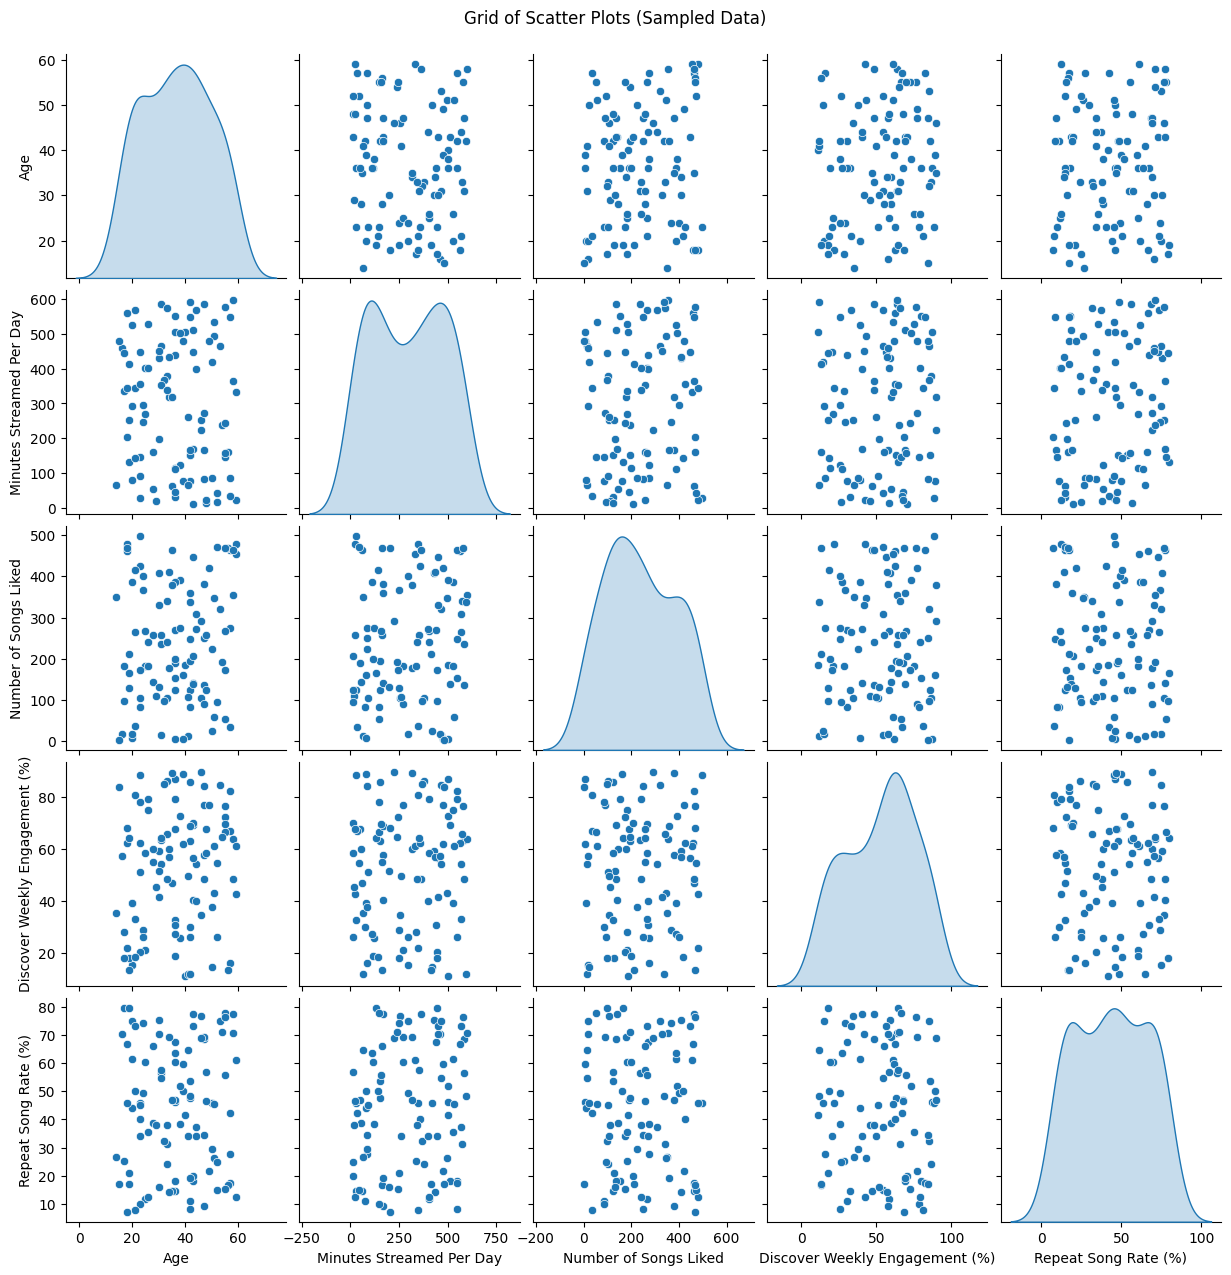

In [34]:
num_cols = df.select_dtypes(include=['number']).columns
num_samples = 100

df_sample = df[num_cols].sample(n=min(num_samples, len(df)), random_state=42)

sns.pairplot(df_sample, diag_kind='kde', corner=False)
plt.suptitle("Grid of Scatter Plots (Sampled Data)", y=1.02)
plt.show()

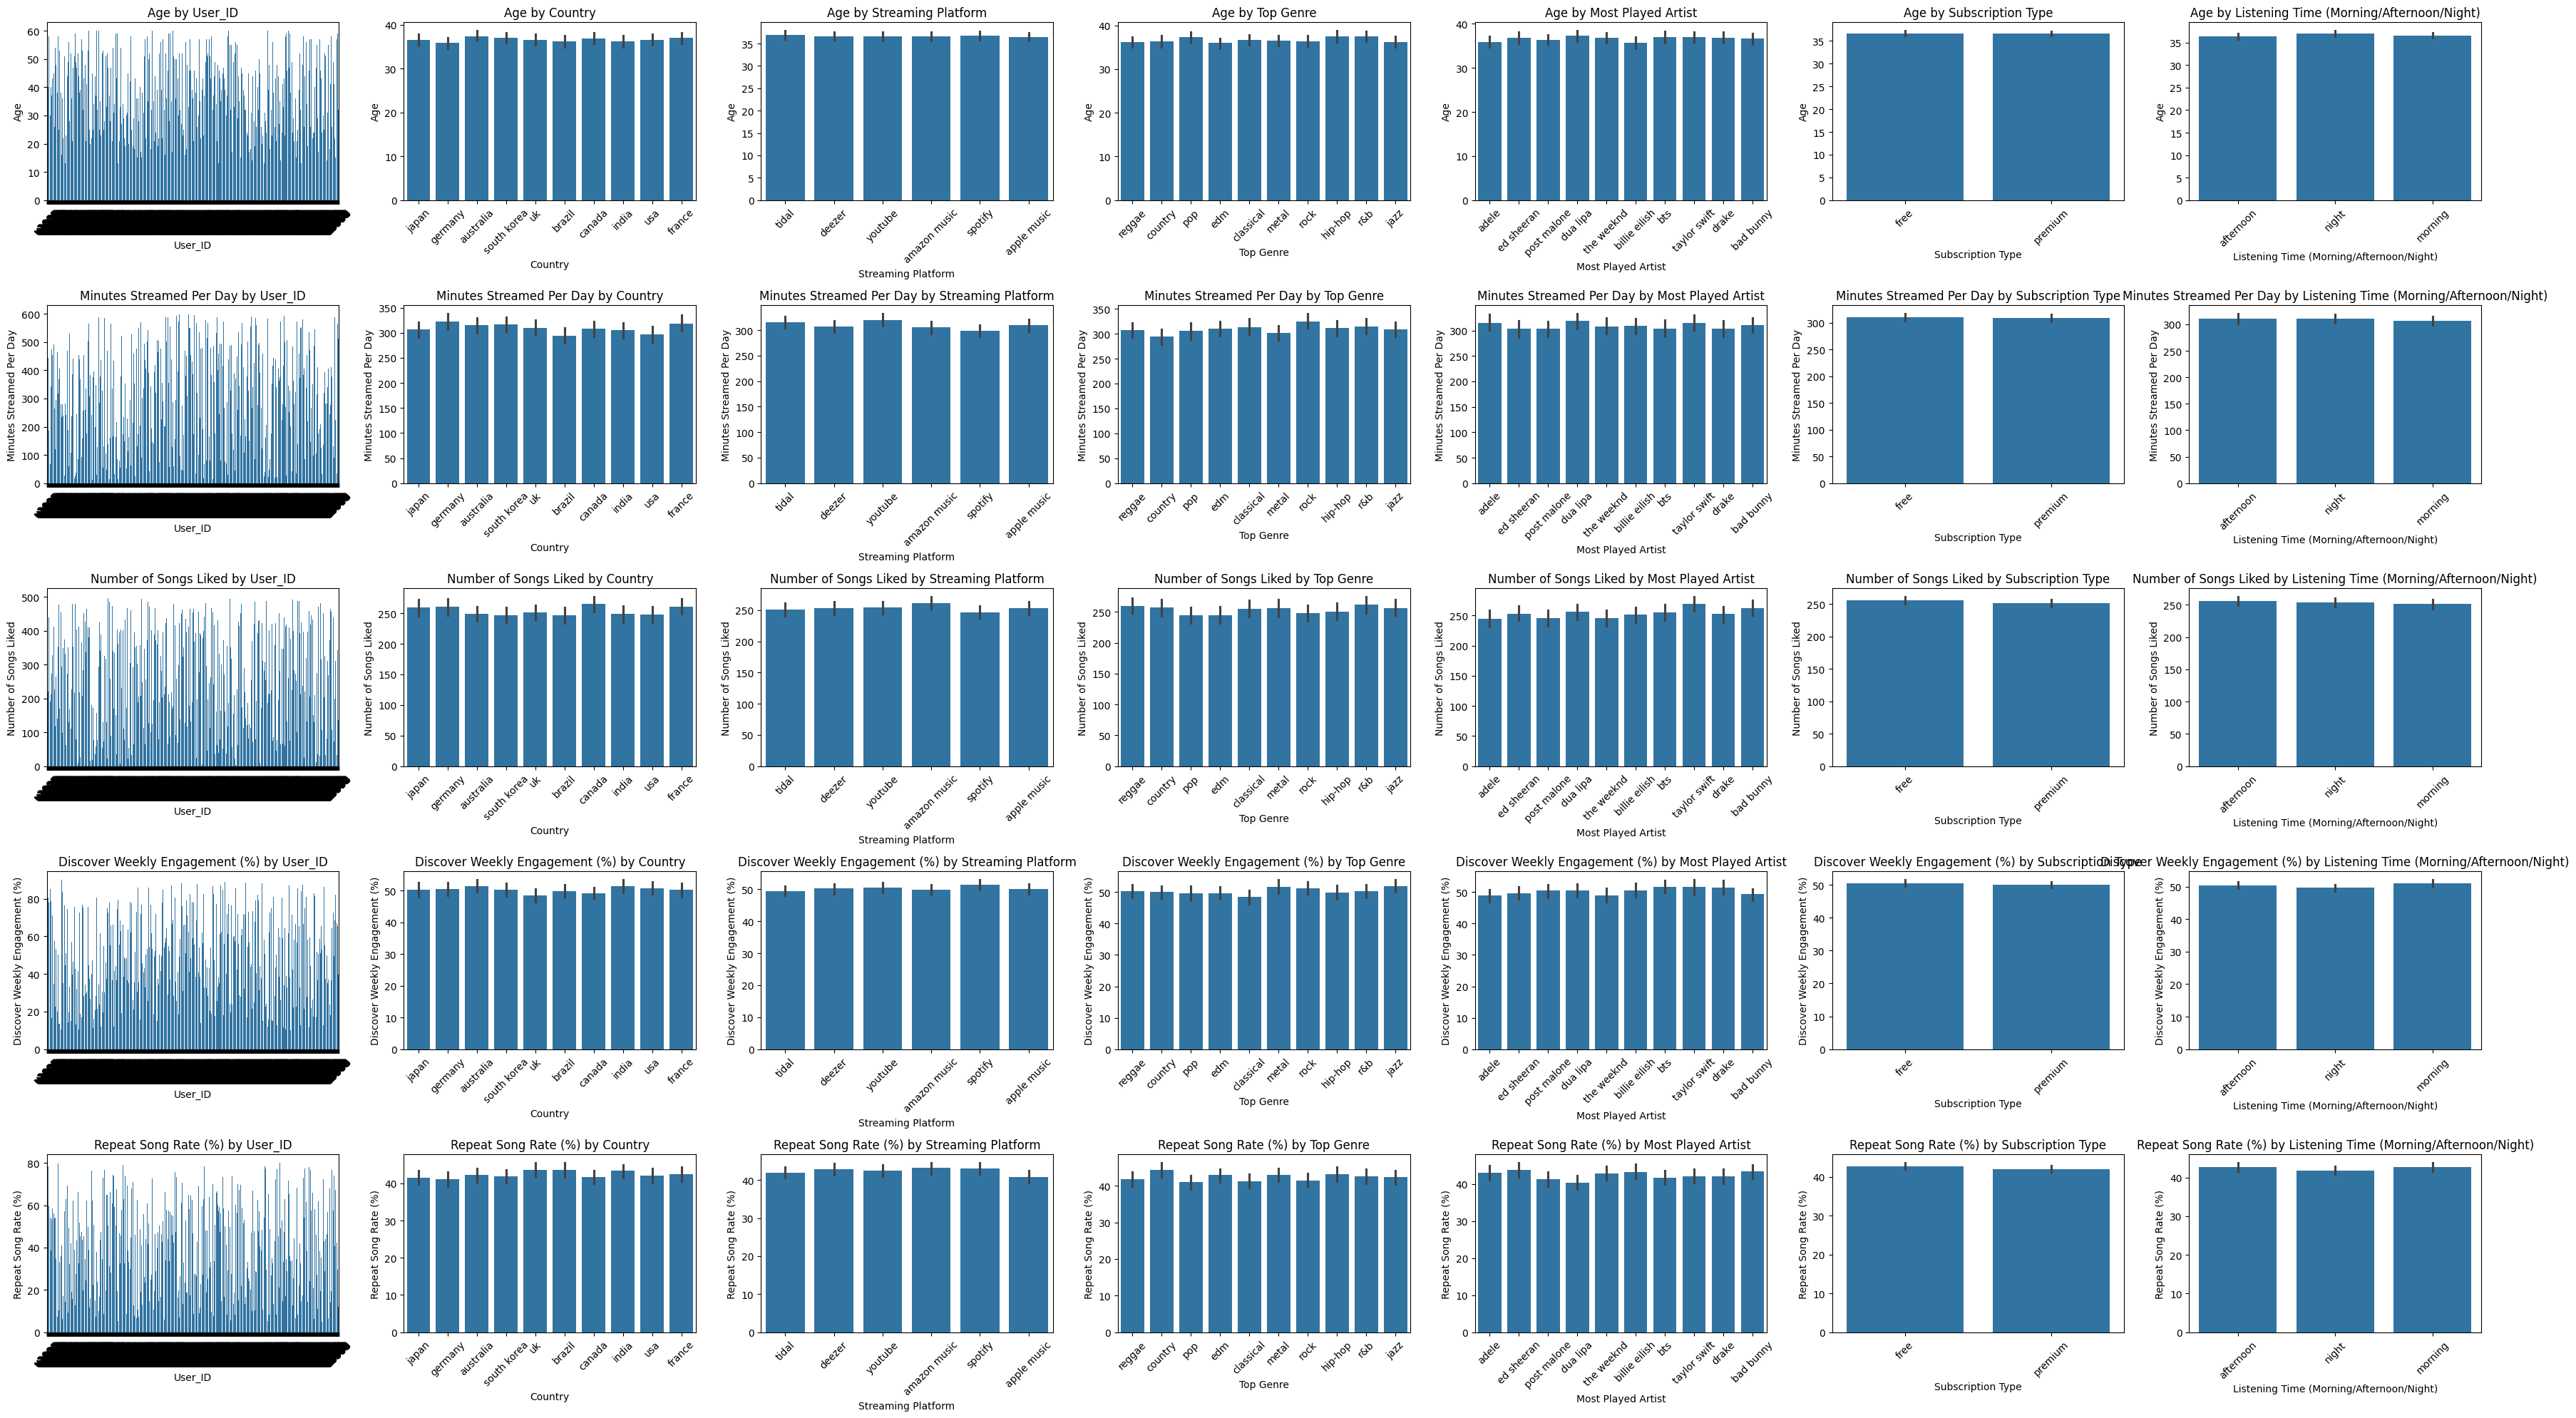

In [25]:
if 'artist' in df.columns and 'time' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['artist'], y=df['time'], palette="coolwarm")
    plt.title("Box Plot: Time vs Artist")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df['artist'], y=df['time'], palette="magma")
    plt.title("Violin Plot: Time vs Artist")
    plt.xticks(rotation=45)
    plt.show()

# Bar plots for categorical vs numerical variables
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5 * len(cat_cols), 4 * len(num_cols)))
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.barplot(x=df[cat], y=df[num], ax=axes[i, j])
        axes[i, j].set_title(f"{num} by {cat}")
        axes[i, j].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [26]:
num_cols = [col for col in df.select_dtypes(include=['number']).columns if col != 'user_id']

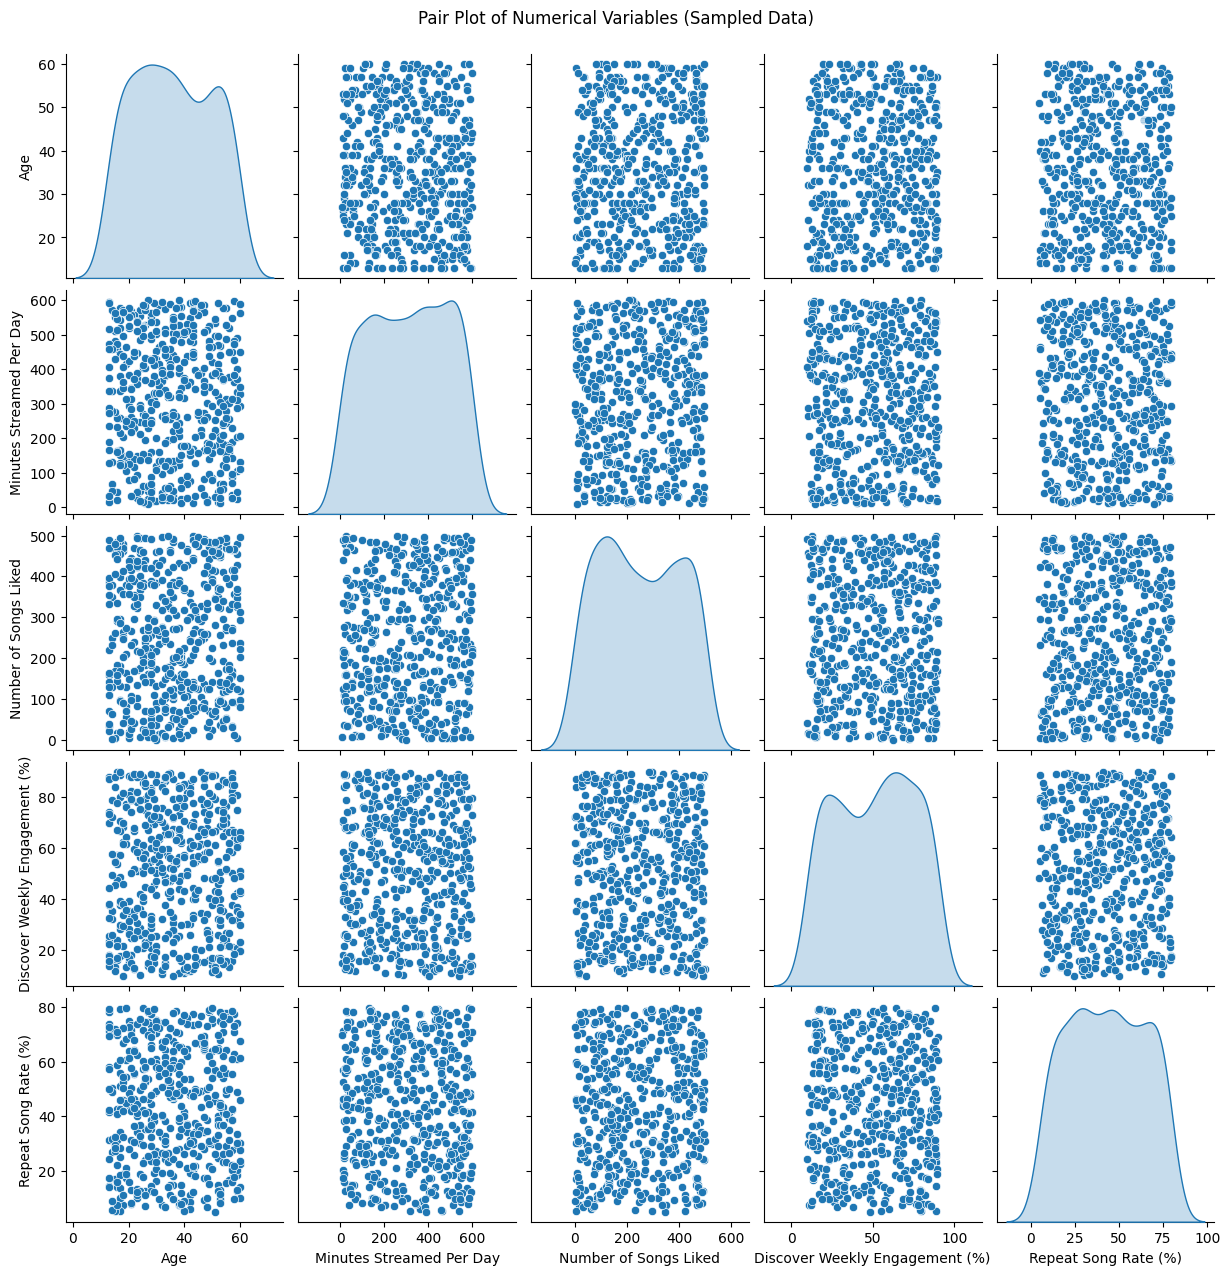

In [31]:
df_sample = df[num_cols].sample(n=min(500, len(df)), random_state=42)
sns.pairplot(df_sample, diag_kind='kde')  # Removed palette to prevent warning
plt.suptitle("Pair Plot of Numerical Variables (Sampled Data)", y=1.02)
plt.show()

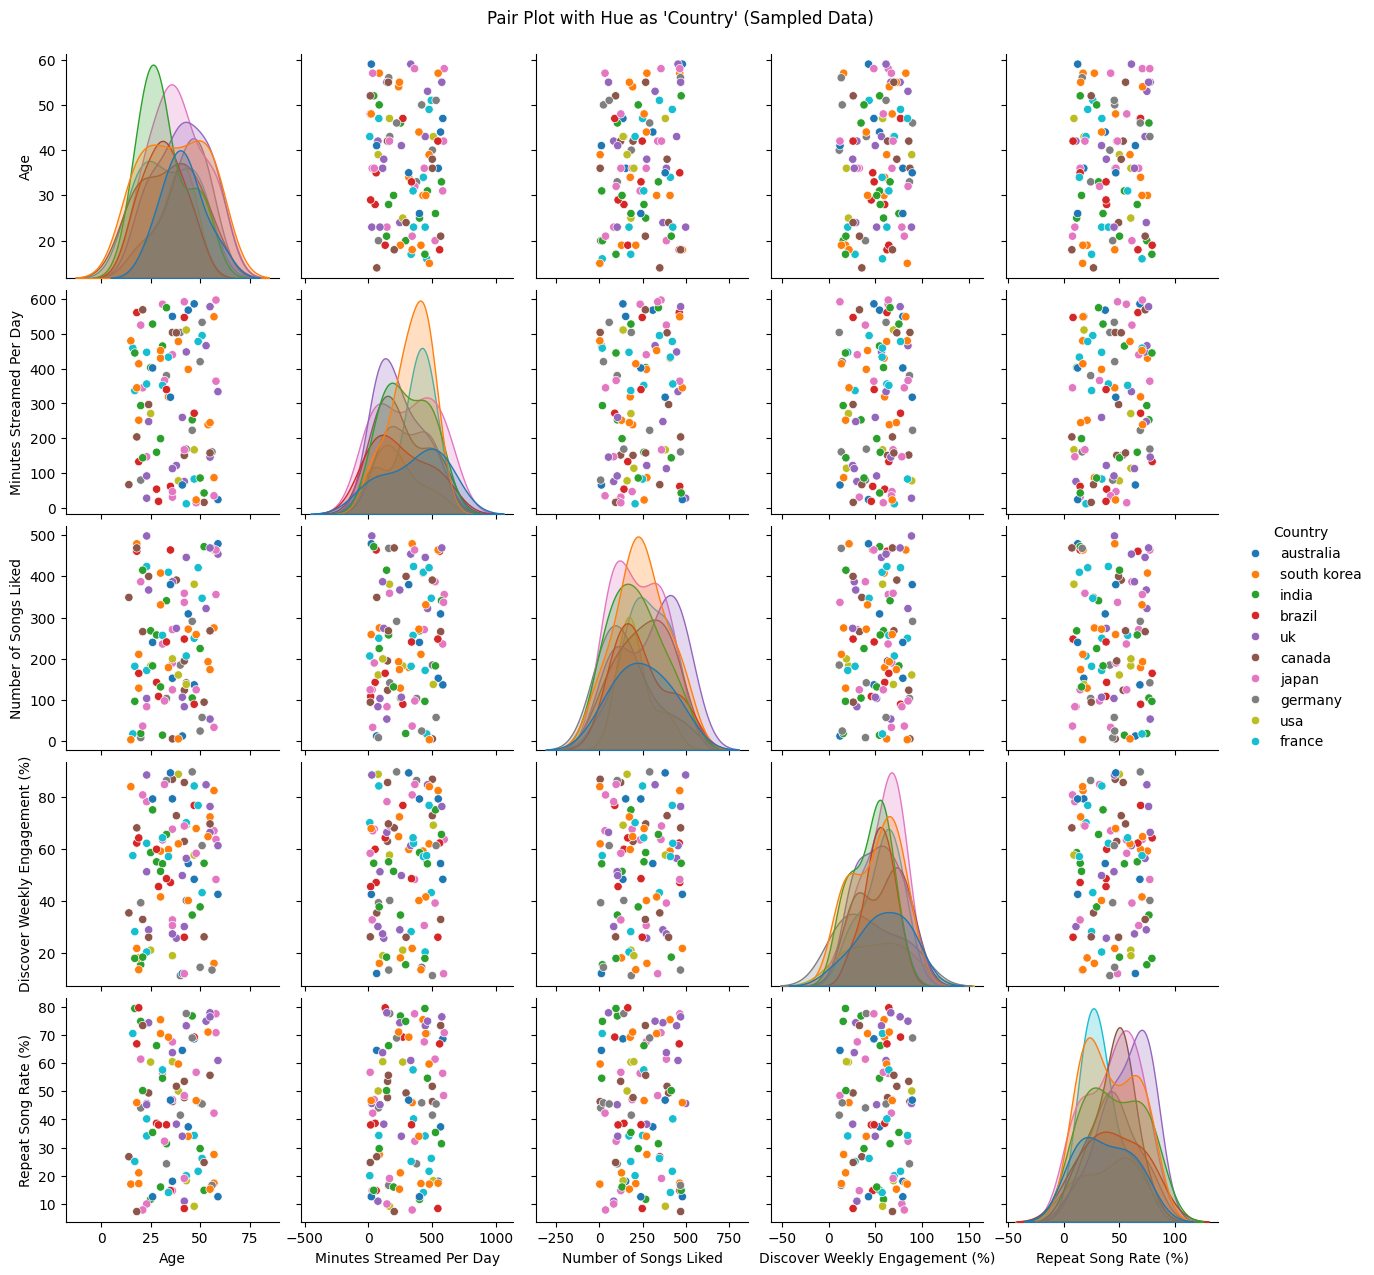

In [50]:
if 'Country' in df.columns:
    num_samples = 100  # Limit data for better visualization
    df_sample = df.sample(n=min(num_samples, len(df)), random_state=42)

    sns.pairplot(df_sample, hue='Country', diag_kind='kde', corner=False)
    plt.suptitle("Pair Plot with Hue as 'Country' (Sampled Data)", y=1.02)
    plt.show()

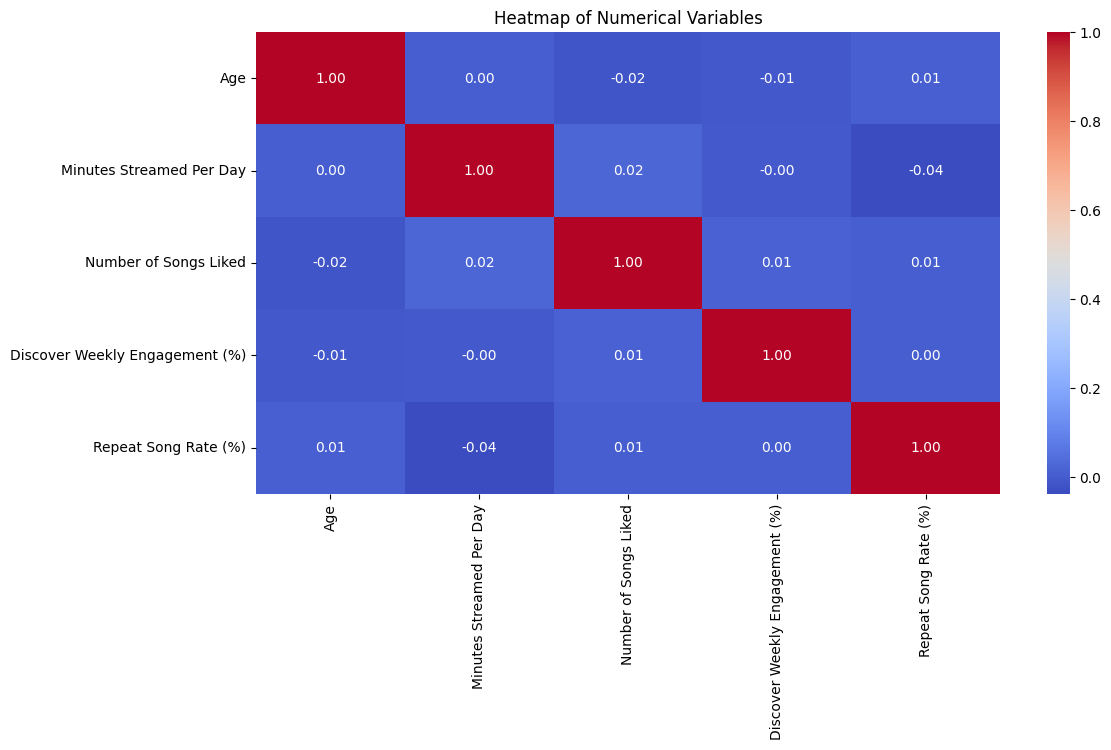

In [35]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'User_ID']
fig, axes = plt.subplots(len(cat_cols), len(cat_cols), figsize=(5 * len(cat_cols), 5 * len(cat_cols)))
for i, cat1 in enumerate(cat_cols):
    for j, cat2 in enumerate(cat_cols):
        if i != j:
            cross_tab = pd.crosstab(df[cat1], df[cat2])
            sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt="d", ax=axes[i, j])
            axes[i, j].set_title(f"{cat1} vs. {cat2}")
        else:
            axes[i, j].axis("off")
plt.tight_layout()
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

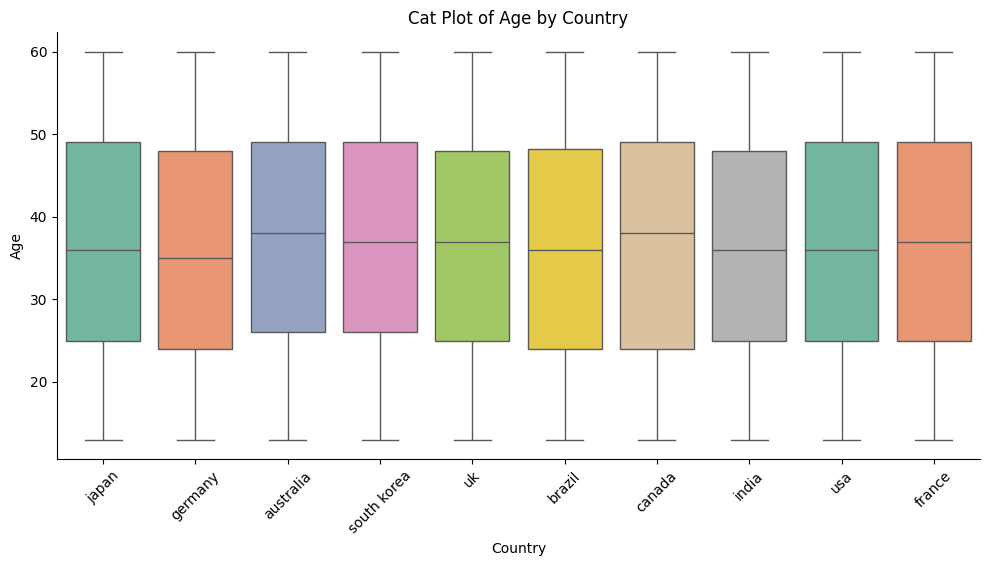

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

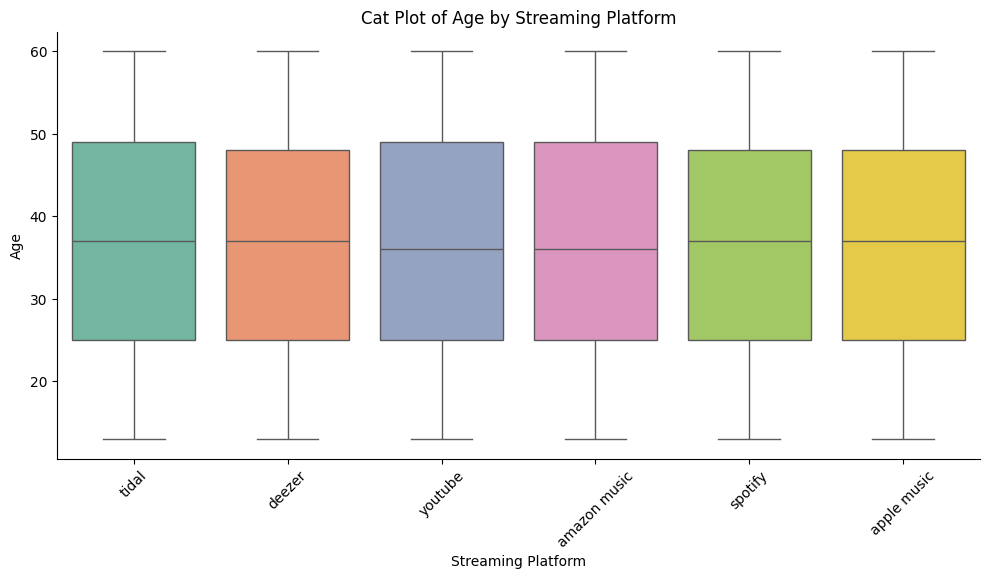

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

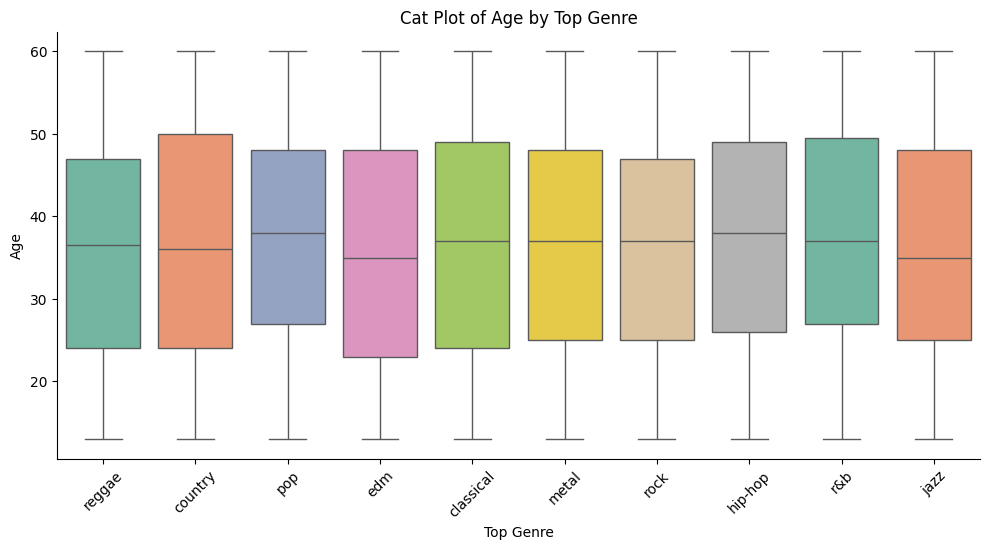

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

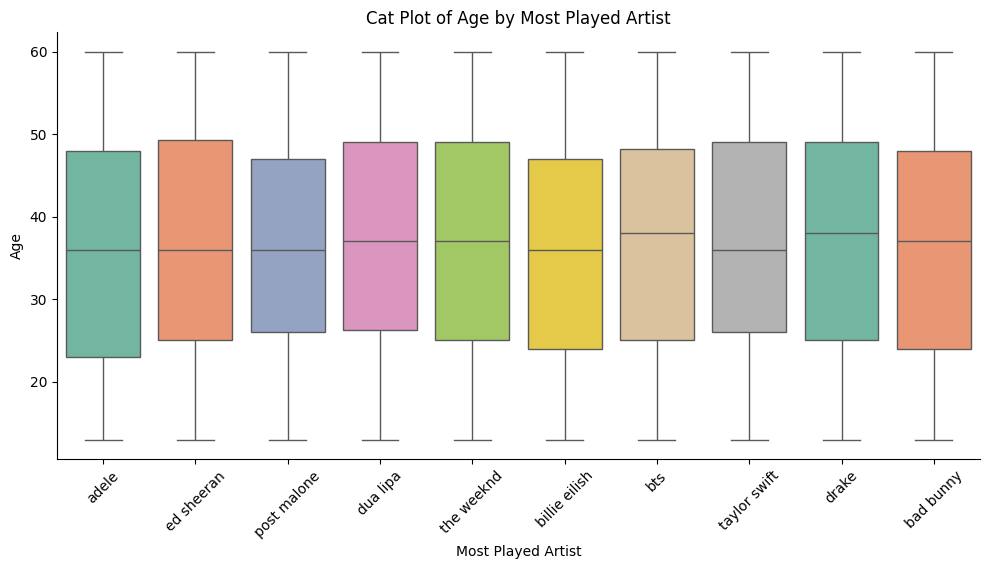

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

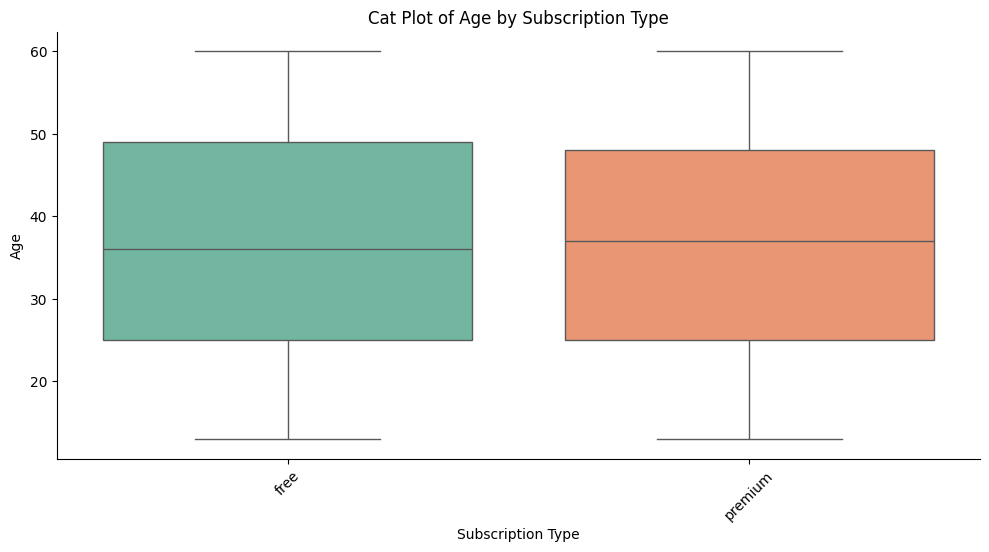

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

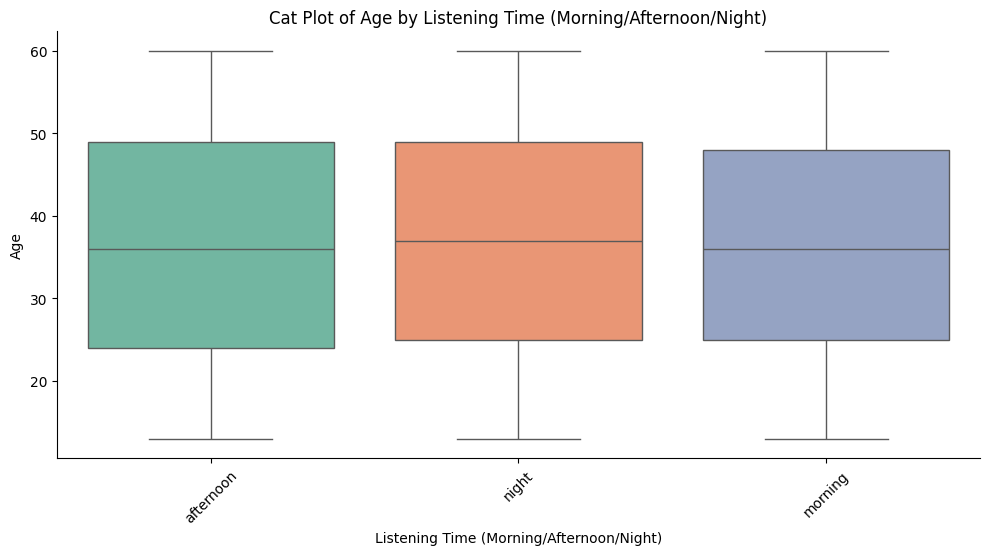

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

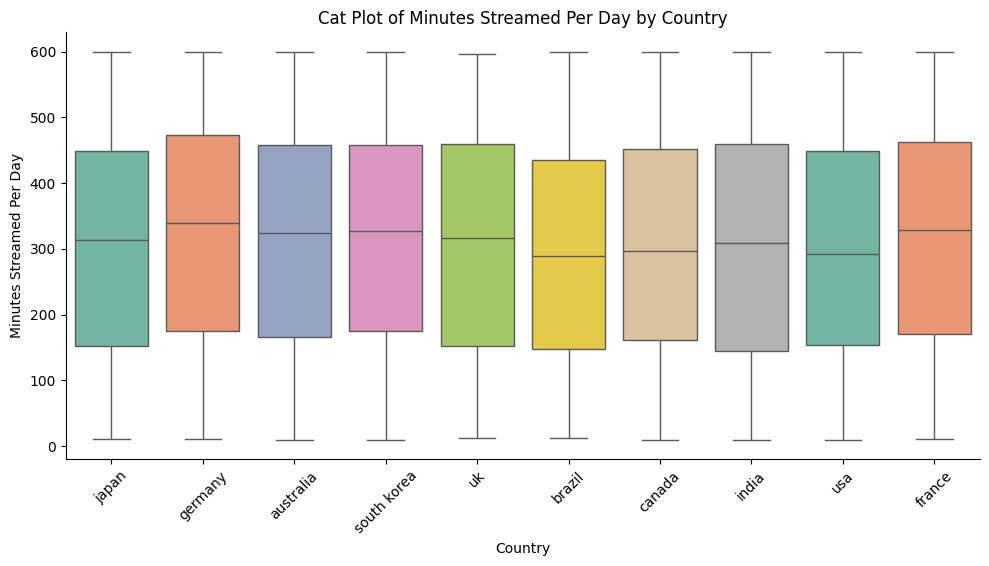

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

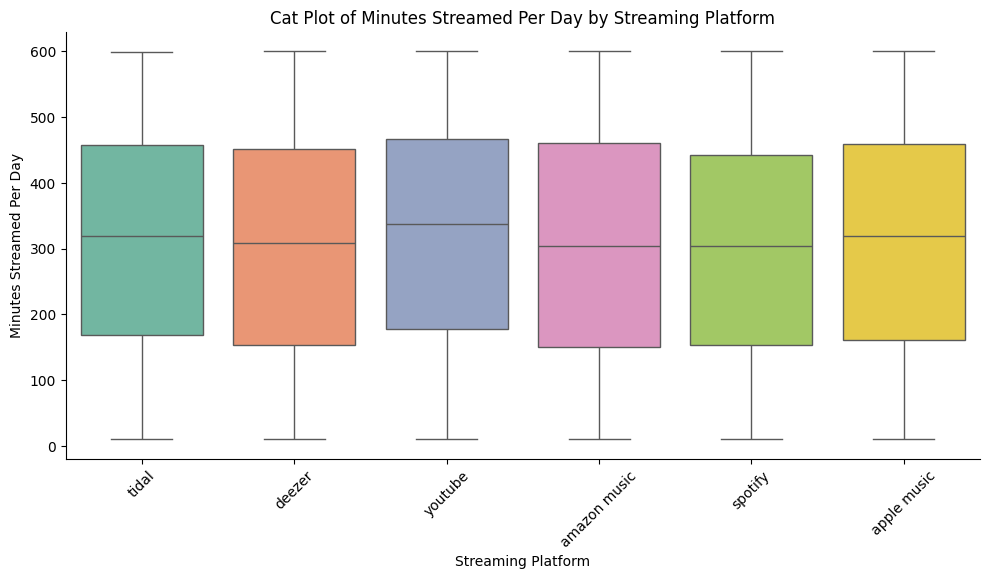

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

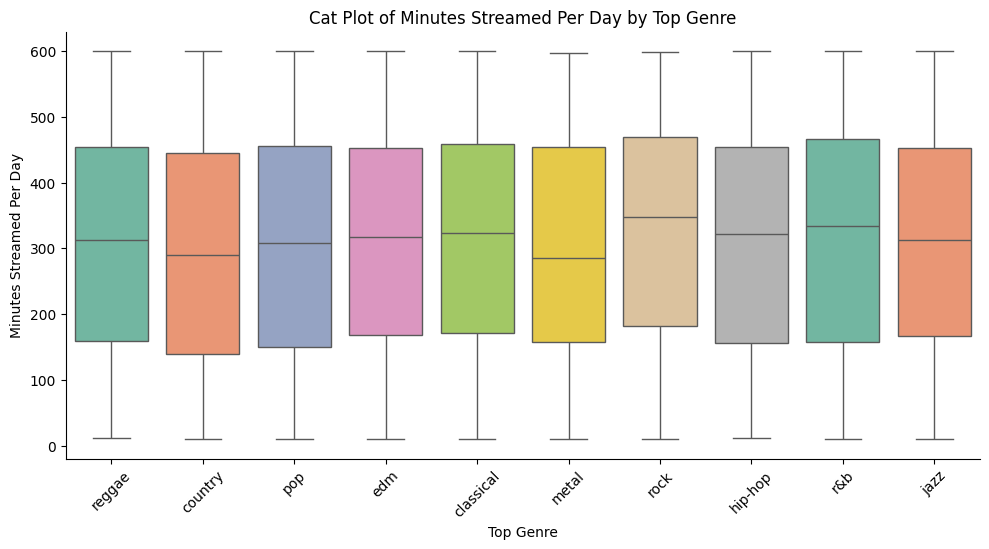

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

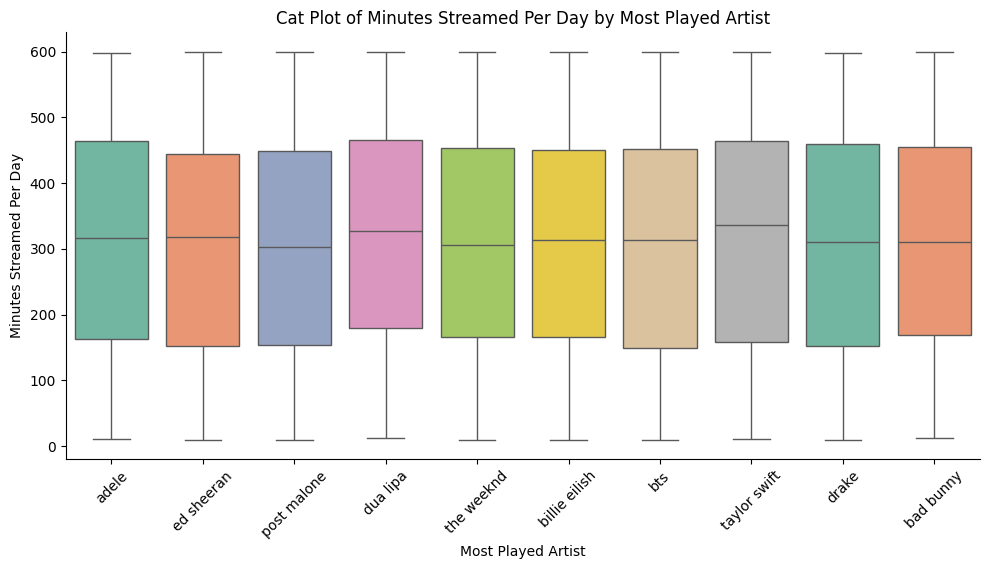

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

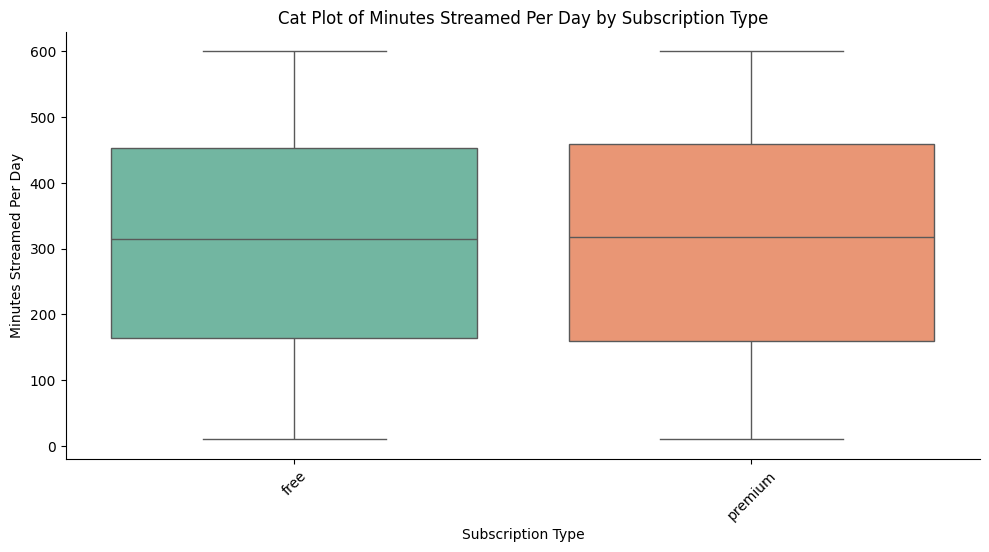

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

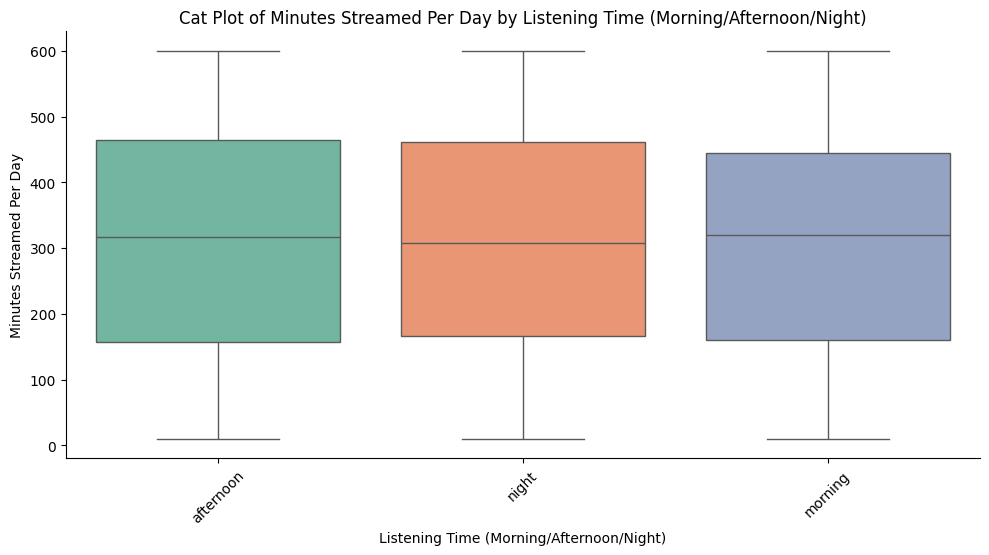

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

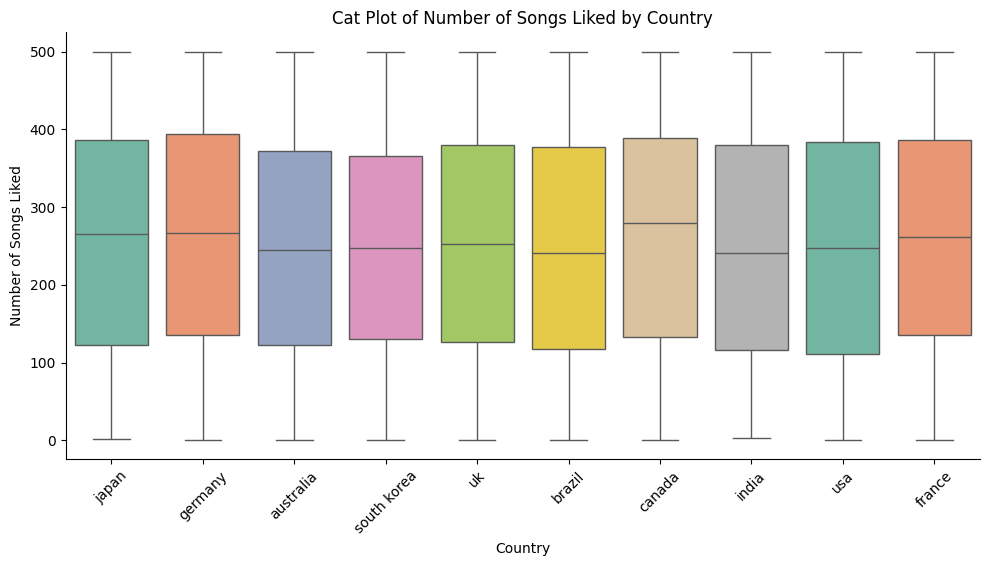

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

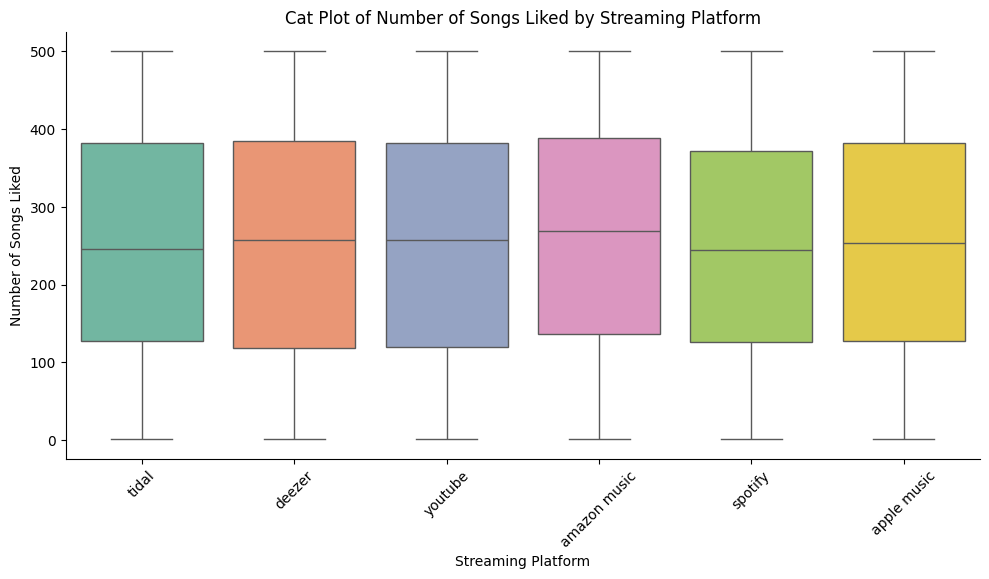

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

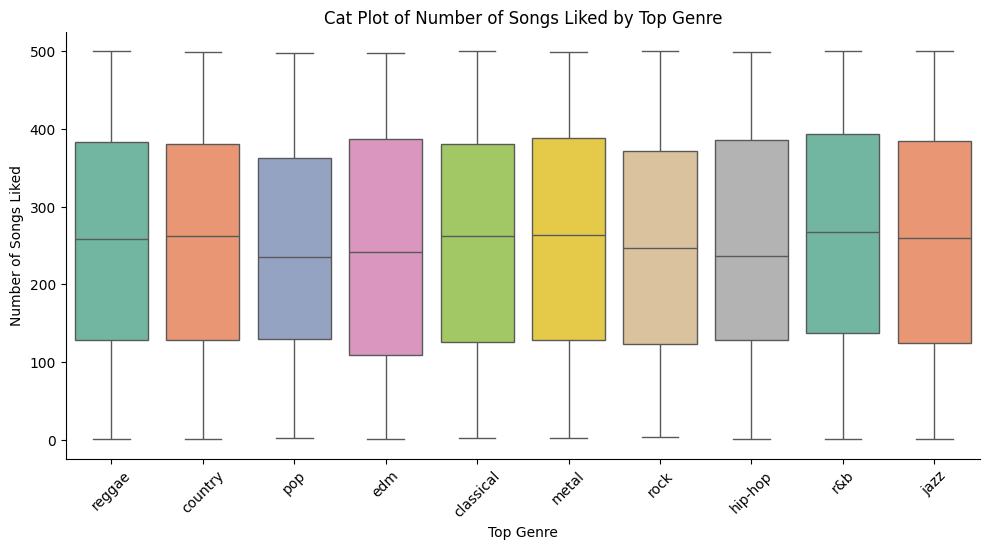

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

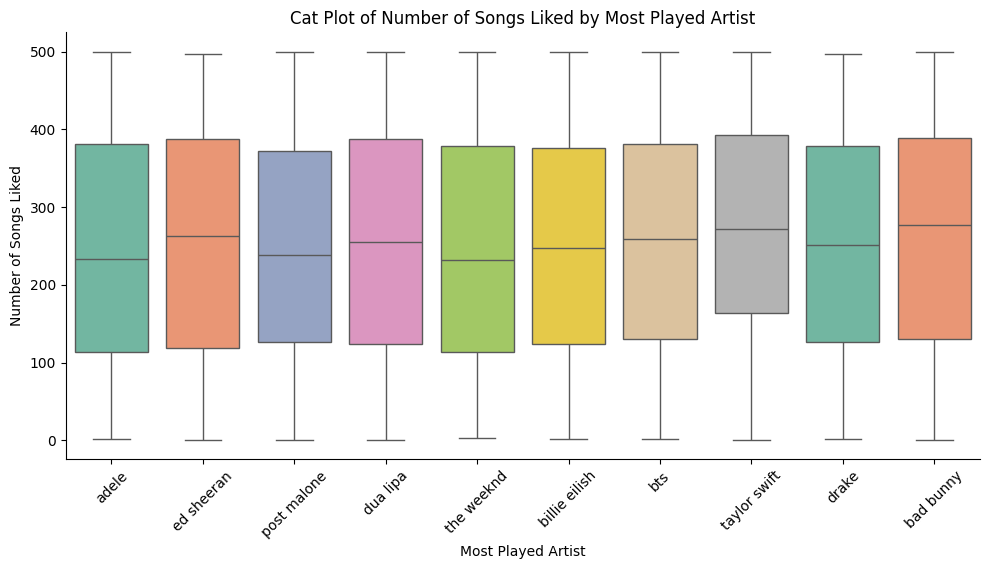

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

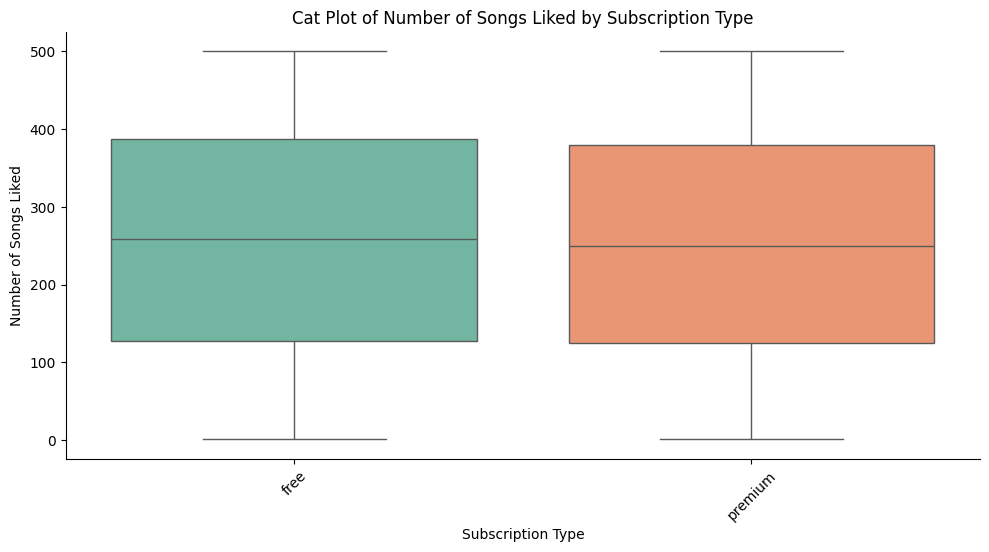

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

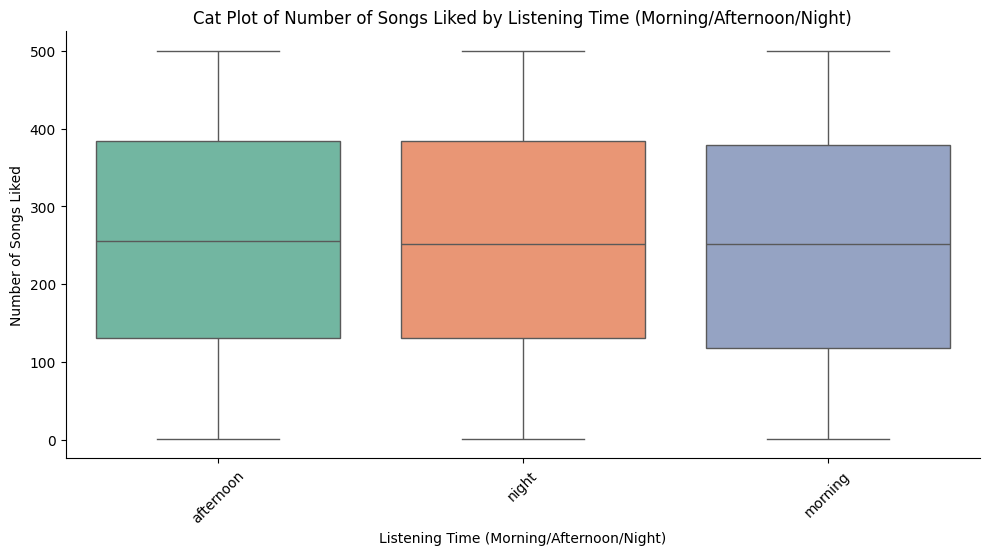

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

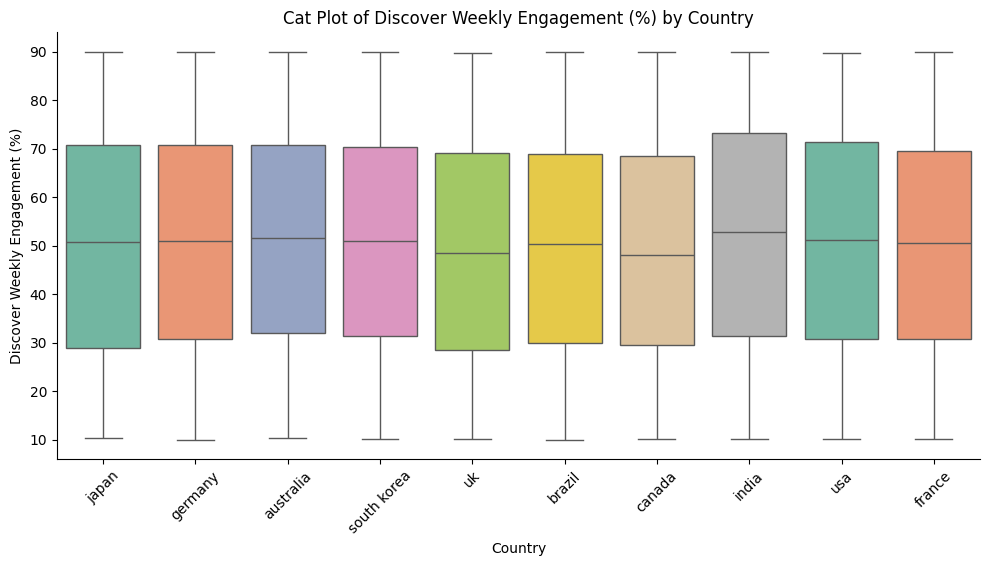

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

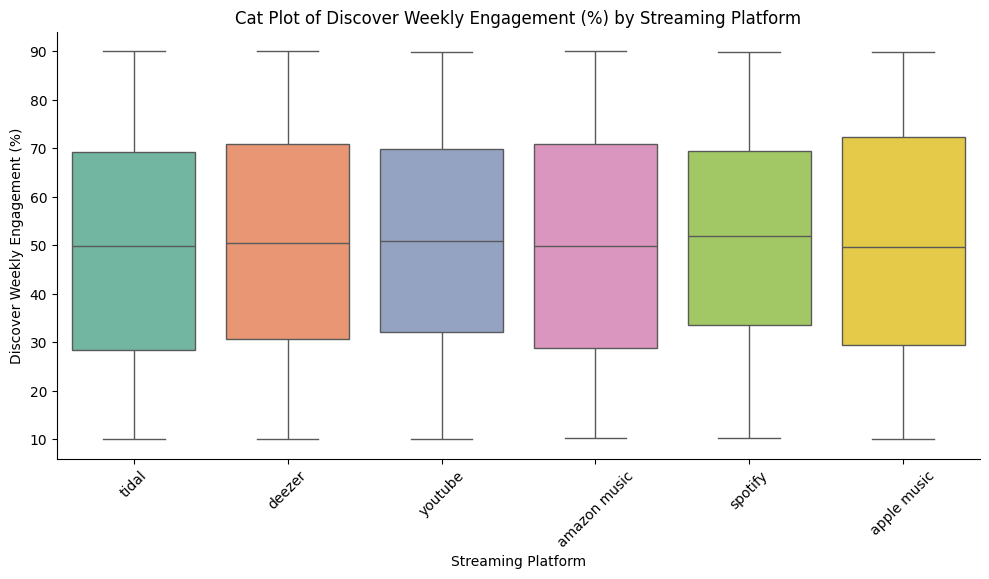

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

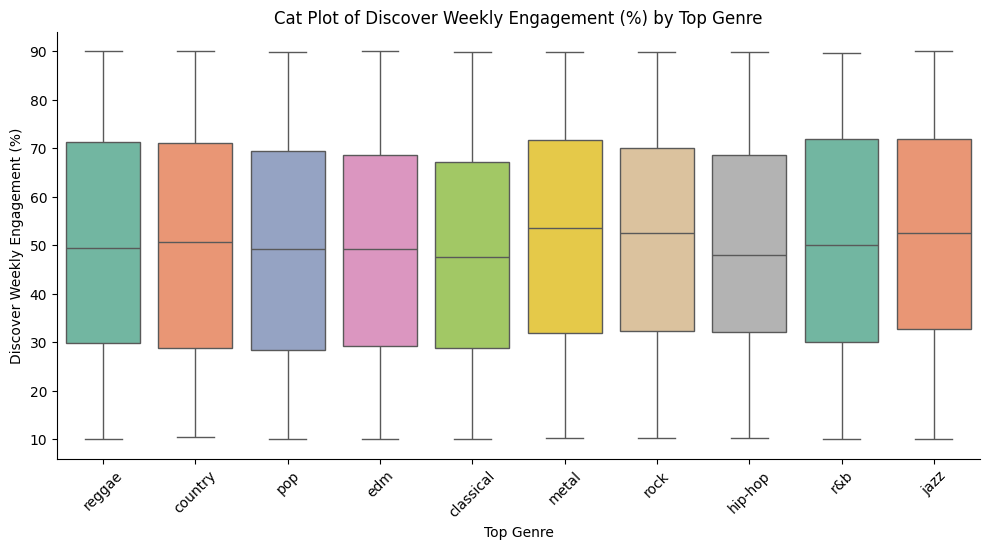

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

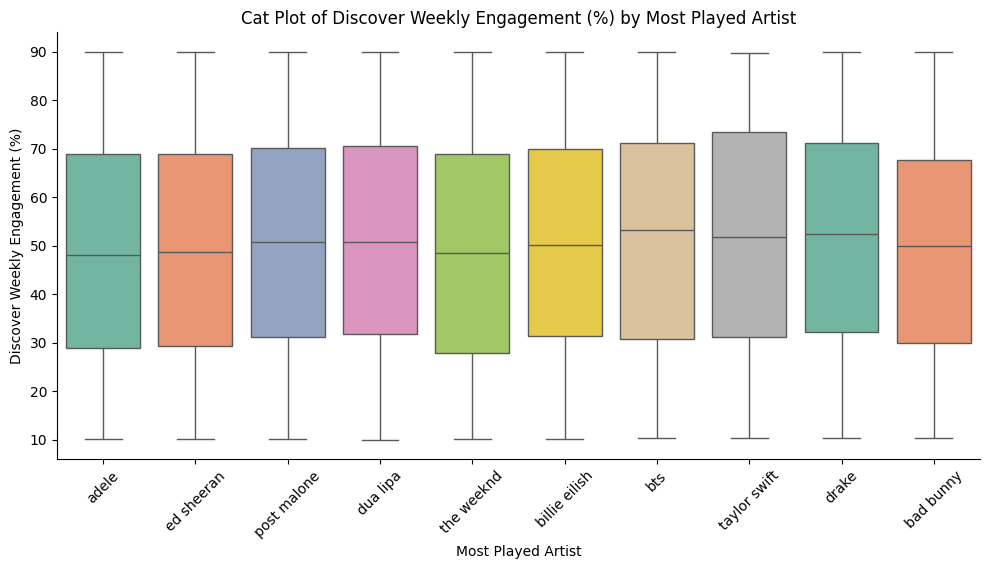

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

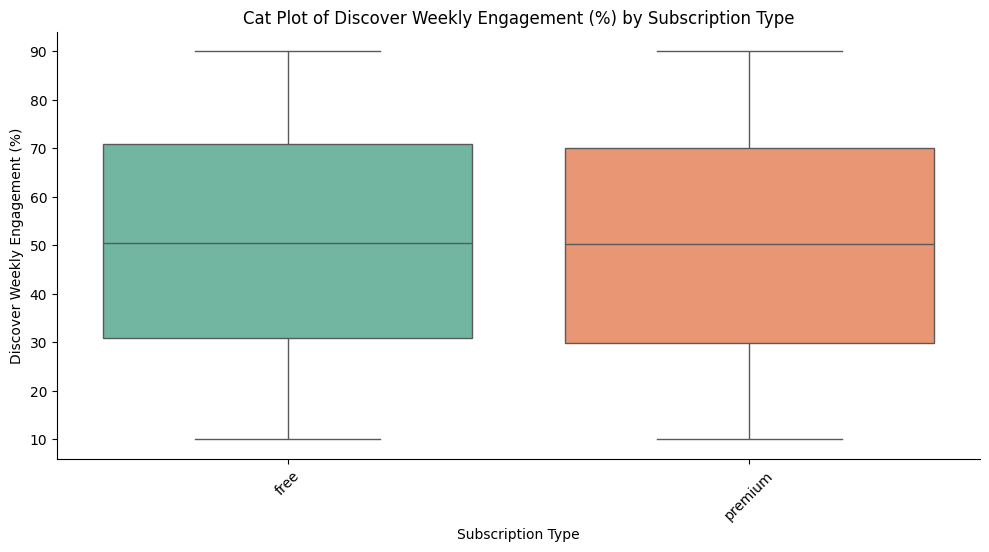

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

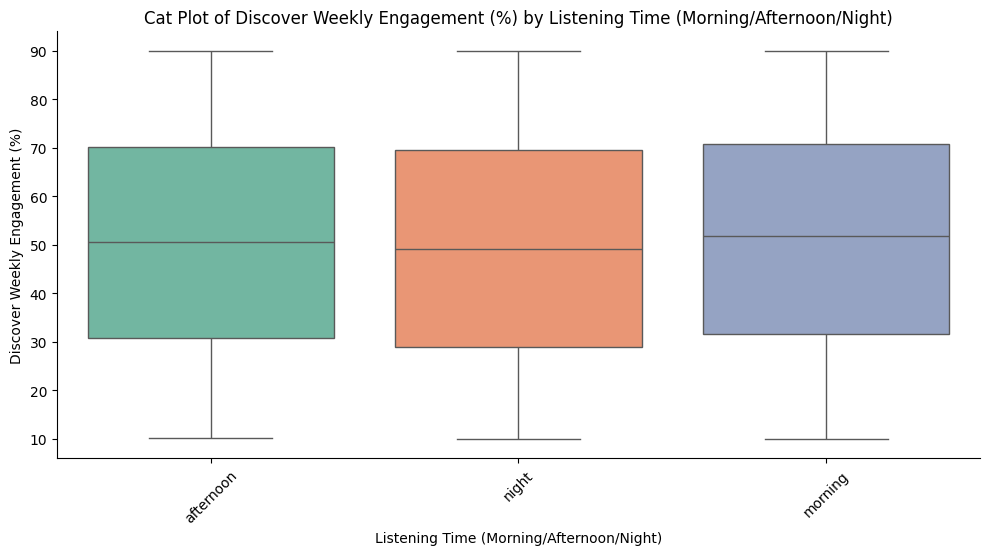

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

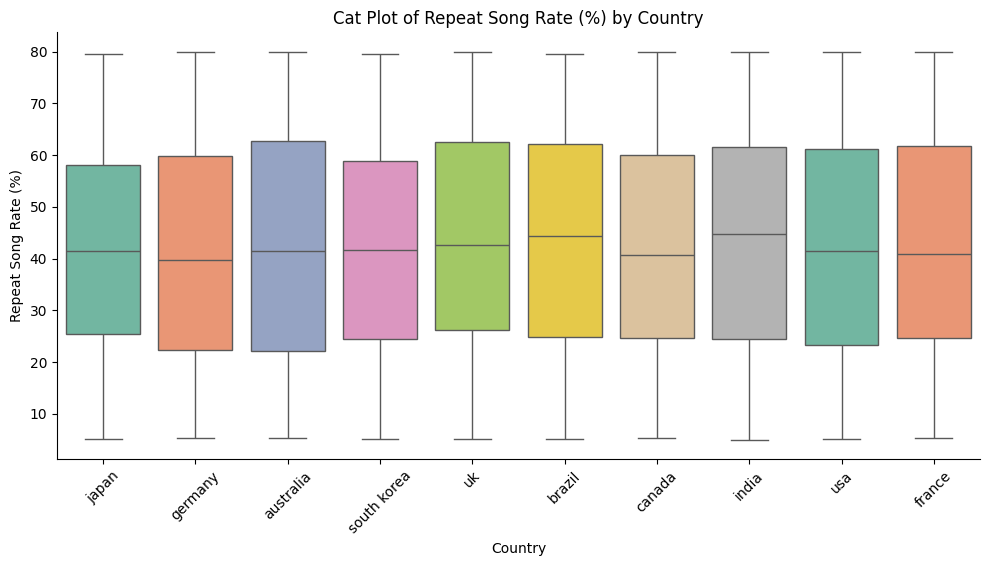

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

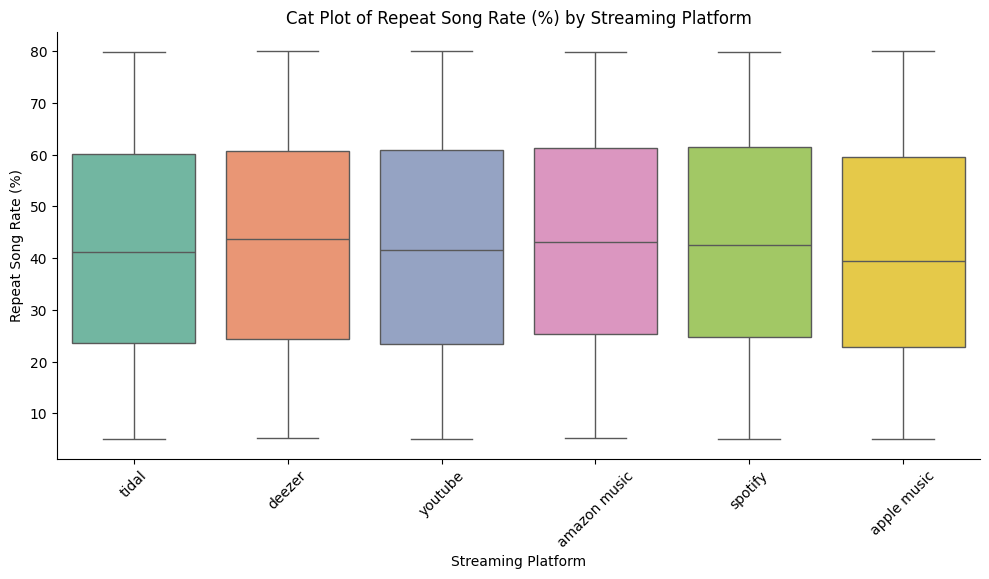

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

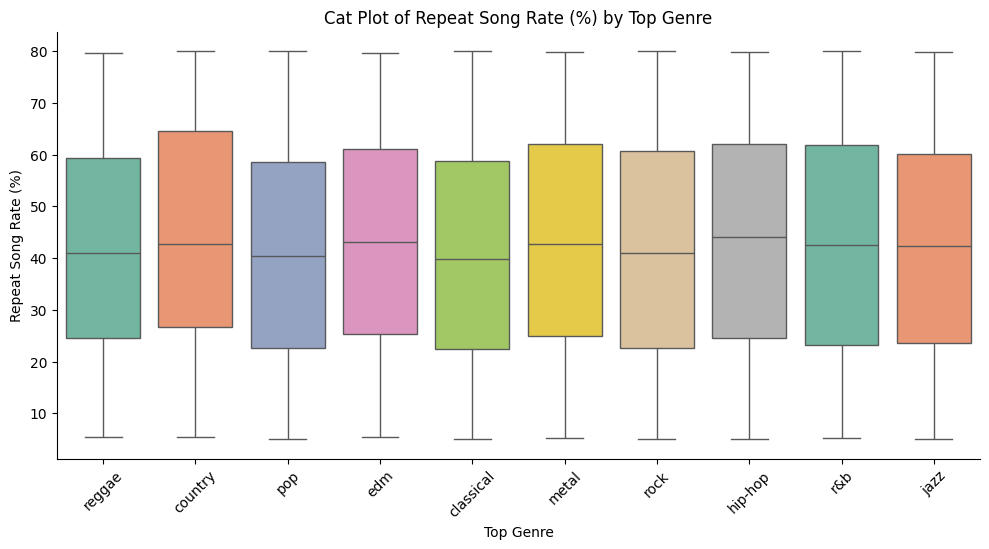

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

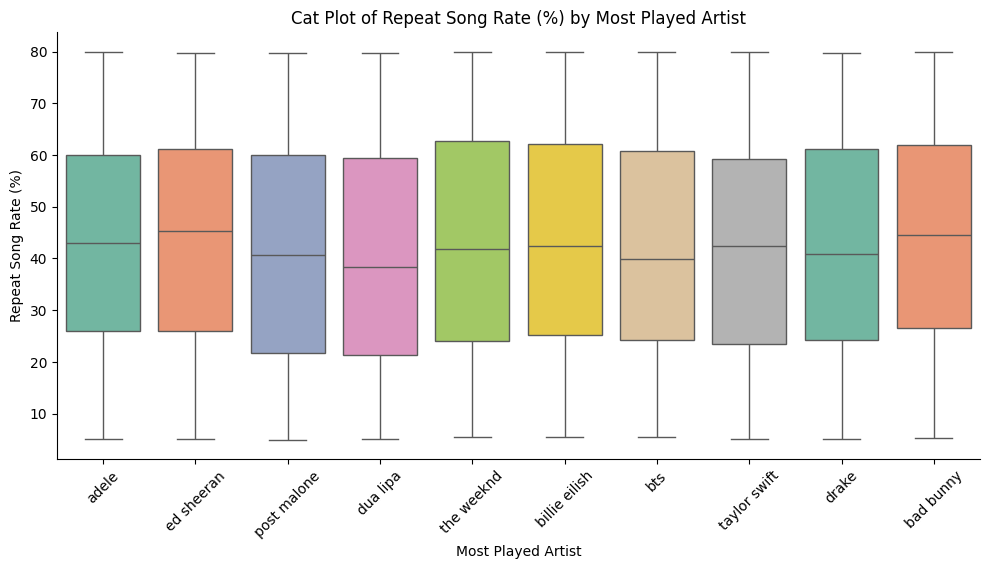

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

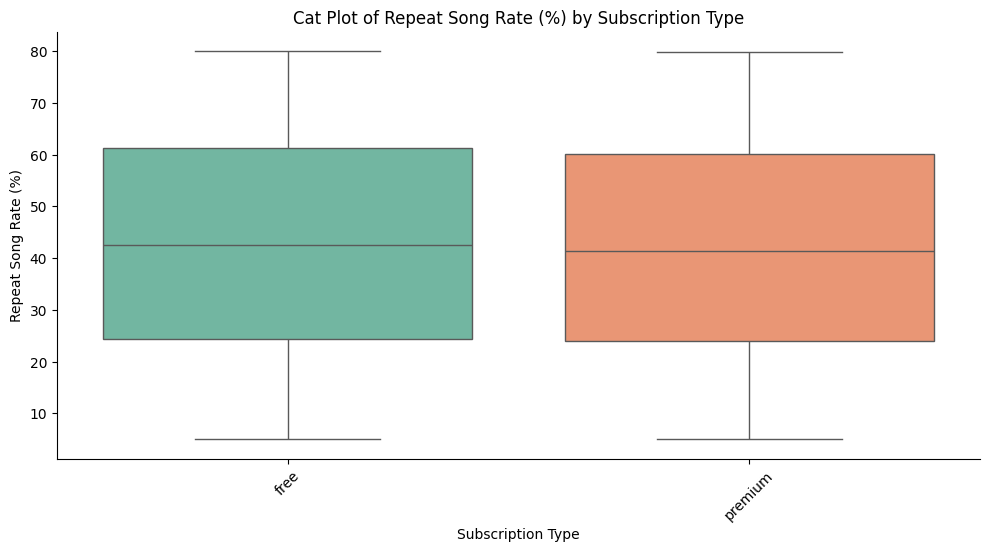

<ipython-input-54-f91335913097>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")


<Figure size 1000x500 with 0 Axes>

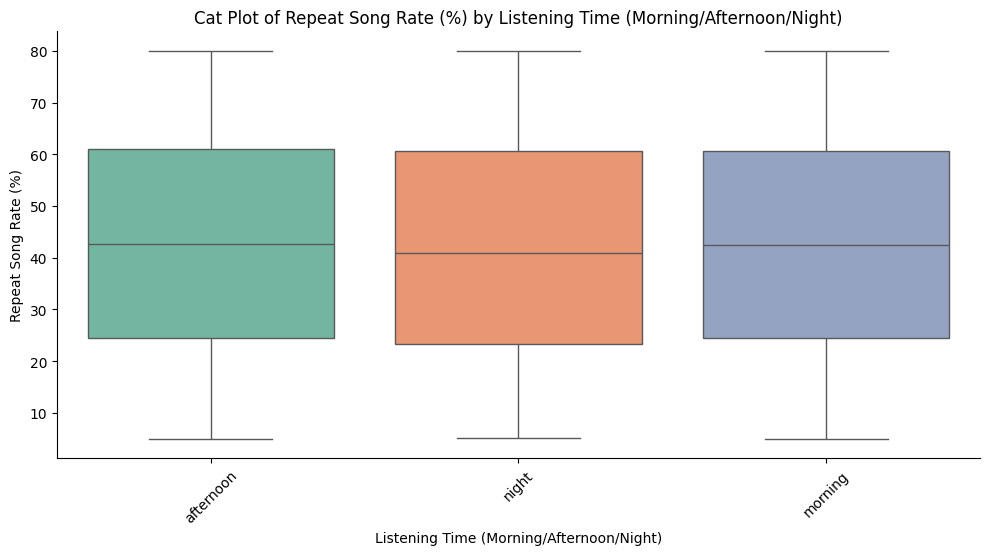

In [54]:
num_cols = [col for col in df.select_dtypes(include=['number']).columns]
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'User_ID']

# Create catplots for each numerical-categorical combination
for num in num_cols:
    for cat in cat_cols:
        plt.figure(figsize=(10, 5))
        sns.catplot(x=cat, y=num, data=df, kind="box", height=5, aspect=2, palette="Set2")
        plt.xticks(rotation=45)
        plt.title(f"Cat Plot of {num} by {cat}")
        plt.show()